First we will define some examples of graph which the algorithm may be applied to. The graphs will be defined as 2-tuples with the first entry containing the adjacentcy matrix of the graph. The second will contain the names of the verticies in the graph, in the same order as the columns of the adjacentcy matrix (these can be string, floats or int).

In [3]:
import numpy as np
import random
import networkx as nx
import matplotlib as plt

In [55]:
graph_weighted_1 = ([[0, 3, 10, 0, 0], [3, 0, 8, 0, 0], [10, 8, 0, 4, 15], 
        [0, 0, 4, 0, 9], [0, 0, 15, 9, 0]], ['1', '2', '3', '4', '5'])

graph_directed_1 = ([[0, 3, 15, 0, 0], [1, 0, 8, 0, 0], [10, 16, 0, 4, 25], 
        [0, 0, 4, 0, 9], [0, 0, 15, 9, 0]], ['a', 'b', 'c', 'd', 'e'])

graph_1 = ([[0, 1, 1, 0, 0], [1, 0, 1, 0, 0], [1, 1, 0, 1, 1], 
        [0, 0, 1, 0, 1], [0, 0, 1, 1, 0]], ['v', 'w', 'x', 'y', 'z'])

graph_self_loop_1 = ([[0, 3, 10, 0, 0], [3, 7, 8, 0, 0], [10, 8, 0, 4, 15], 
        [0, 0, 4, 0, 9], [0, 0, 15, 9, 3]], [1, 2, 3, 4, 5])

graph_weighted_2 = ([[0, 5, 0, 0], [5, 0, 6, 0], [0, 6, 0, 7], 
        [0, 0, 7, 0]], ['1', '2', '3', '4'])

graph_disconnected_1 = ([[0, 5, 2, 0], [5, 0, 6, 0], [2, 6, 0, 0], 
        [0, 0, 0, 0]], ['1', '2', '3', '4'])

set_of_graphs = [graph_weighted_1, graph_directed_1, graph_1, graph_self_loop_1, graph_weighted_2]
for i in range(len(set_of_graphs)):
    if len(set_of_graphs[i][0]) != len(set_of_graphs[i][1]):
        print("Error, the" + str(i) + "th graph's vertex names are not the right length.")
        

In [16]:
def check_undirected(graph):
    ''' This function takes a graph and returns `True` if the graph is undirected (and has no self-loops)
    and returns `False` otherwise. '''
    
    # check for symetry in the adjacentcy matrix (undirected)
    adj_transpose = np.array(graph[0]).T.tolist()
    
    if graph[0] == adj_transpose:
        # check all values along the diagonal are zero (no self-loops)
        if sum([graph[0][i][i] for i in range(len(graph[0]))]) == 0:
            return True
    return False

In [85]:
def display_graph(graph):
    ''' This function takes a graph tuple (as defined above), and converts it into a networkx graph. 
    From here the graph is ploted and the networkx object is returned by the object. This is important
    as it will allow the use of networkx's shortest paths function which can check the results of this
    code. '''
    
    # create mapping from column index to vertex name.
    vertex_names = {}
    for i in range(len(graph[1])):
        vertex_names[i] = graph[1][i]
        
    # create networkx version of the graph from the adjacentcy matrix.
    adj_matrix = np.asarray(graph[0])
    if check_undirected(graph):
        G = nx.from_numpy_matrix(adj_matrix, parallel_edges = True)
        
        # Credit: https://stackoverflow.com/questions/28372127/add-edge-weights-to-plot-output-in-networkx
        # Plot G
        pos=nx.circular_layout(G)
        nx.draw_networkx(G, pos, labels = vertex_names, node_color = 'r')
    
        weights = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
    '''
    else:
        G = nx.from_numpy_matrix(adj_matrix, parallel_edges = True, create_using = nx.DiGraph)
        
        # Credit: https://stackoverflow.com/questions/28372127/add-edge-weights-to-plot-output-in-networkx
        # Plot G
        pos=nx.circular_layout(G)
        nx.draw_networkx(G, pos, labels = vertex_names, node_color = 'r')
    
        weights = nx.get_edge_attributes(G, 'weight')
        weights_2 = {}
        for edge1 in weights.keys():
            for edge2 in weights.keys():
                if edge1[0] == edge2[1] and edge1[1] == edge2[0]:
                    if len(weights_2[edge1]) > 0:
                        weights_2[edge1] = 
        nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
    ''' 
    return G

In [18]:
def Arg_Minimum_not_S(mapping, S):
    '''  This function takes `mapping` a dictionary, with numeric only output values and a list S of keys for `mapping`. 
    From this it returns the input value that is not in S which yeilds the lowest mapping output. This will be used to 
    find the vertex with the smallest label that is not in S, in the `djikstras` algorithm function. '''
    
    # check mapping is a dictionary
    assert type(mapping) == type({}), "Input `mapping` is not a dictionary."
    # check S is a list
    assert type(S) == type([]), "Input S is not a list."
    
    # check all output values of mapping are numeric
    assert sum([str(value).isnumeric() for value in mapping.values()]) == len(mapping.values()), "The dictionary input has a non-numeric value (output)"
    # check all elements of S are keys for `mapping`
    assert sum([(i in mapping.keys()) for i in S]) == len(S), 'Not all S elements are keys.'
    
    # create a shallow copy of the mapping (dictionary)
    mapping = mapping.copy()
    
    for key in S:
        # mapping is a shallow copy of the dictionary passed into the function
        # so we can delete elements without causing issues.
        mapping.pop(key)
        
    # If dictionary is empty return None
    if len(mapping.keys()) == 0:
        return None
    
    # Find lowest value and put all keys that generate this value into `arg_min`
    arg_min = []
    lowest_value = min(mapping.values())
    for key in mapping.keys():
        if mapping[key] == lowest_value:
            arg_min.append(key)
    # Here we return a random element of the `arg_min` list, this won't affect djikstras algorithm.
    return random.choice(arg_min)

In [19]:
def path_from_parent(starting_vertex, parent_dict, base_vertex, vertex_set):
    ''' This function traces vertecies back through their `parent`s to find the path from the `base vertex` 
    to the `starting vertex`. This is useful as the labeling for djistras algorithm only stores a `parent`
    the vertex adjacent to the `starting vertex` in its minimum path. So we have to find the path by tracing
    back through the heirachy of `parent`s. '''
    # Initialise path and current vertex
    path = [vertex_set[starting_vertex]]
    current_vertex = starting_vertex
    
    # trace through `parent`s until the base_vertex is found
    while current_vertex != base_vertex:
        current_vertex = parent_dict[current_vertex]
        path.append(vertex_set[current_vertex])
        
    # return the reverse order of this list, as the path from base_vertex to 
    # starting_vertex.
    return path[::-1]
    

In [41]:
def djikstra(graph, base_vertex):
    ''' This function takes .... and a selected vertex and will display minimum paths from this vertex 
    to all other verticies, as calculated by an implementation of djikstras algorithm'''
    
    # djikstras algorithm can only be applied to undirected graphs with positive weights
    assert check_undirected(graph), "An undirected graph was not input."
    assert min([min(col) for col in graph[0]]) >= 0, "A graph with a negative weight was input."
    assert base_vertex in graph[1], "`base vertex` is not in the graph's vertex set."
    
    # Djikstra's algorithm ususally initialises the distance labels with +inf
    # but for this function it is more practical maintain int type throughout, 
    # and an upper bound(2*(sum of all weights) ie: sum over the adjacentcy matrix) 
    # on distance serves the same purpose.
    UPPER_BOUND_DIST = sum([sum(col) for col in graph[0]])
    
    # convert vertex to an index, the function will work with indicies of the
    # graph and only use the vertex names given at the end whilst printing out
    # results.
    for i in range(len(graph[1])):
        if graph[1][i] == base_vertex:
            base_vertex = i
    
    # Initialise labels for parent and distance.
    labels_dist = {}
    labels_parent = {}
    S = []
    for i in range(len(graph[1])):
        if i != base_vertex:
            labels_dist[i] = UPPER_BOUND_DIST
            labels_parent[i] = '-'
        else: 
            labels_dist[i] = 0
            labels_parent[i] = base_vertex
            
    # Repeat: find vertex not in S with the smallest distance (moving_vertex), 
    # check to see if any edges between this vertex (moving_vertex) and 
    # other verticies not in S can reduce their distance(label),  
    # if so update the label for parent and distance. 
    # Then move this vertex into S. 
    # Stop: when all elements have been moved into S. 
    while(len(S) < len(graph[1])):
        moving_vertex = Arg_Minimum_not_S(labels_dist, S)
        for i in range(len(graph[1])):
            if (i not in S) and (graph[0][moving_vertex][i] > 0):
                if labels_dist[moving_vertex] + graph[0][moving_vertex][i] < labels_dist[i]:
                    labels_dist[i] = labels_dist[moving_vertex] + graph[0][moving_vertex][i]
                    labels_parent[i] = moving_vertex
        S.append(moving_vertex)
    
    # Check the graph is connected (at least one path between any two verticies),
    # this is equivalent to checking that all labels have been changed.
    for i in range(len(graph[1])):
        if labels_parent[i] == '-':
            print("Graph is not connected, cannot apply djikstras algorthm.")
            return 0
    
    # Display results
    for i in S:
        if i != base_vertex:
            print('Vertex: ' + str(graph[1][i]) + ', Minimum Distance: ' + 
                  str(labels_dist[i]) + ', Path: ' + str(path_from_parent(i, labels_parent, base_vertex, graph[1])))
        else:
            print('Vertex: ' + str(graph[1][i]) + ', Minimum Distance: ' + 
                  str(labels_dist[i]) + ', (base vertex)')
    return 0

My implementation of Djikstra's algorithm:

Vertex: 5, Minimum Distance: 0, (base vertex)
Vertex: 4, Minimum Distance: 9, Path: ['5', '4']
Vertex: 3, Minimum Distance: 13, Path: ['5', '4', '3']
Vertex: 2, Minimum Distance: 21, Path: ['5', '4', '3', '2']
Vertex: 1, Minimum Distance: 23, Path: ['5', '4', '3', '1']

Networkx's implementation of djikstra's algorithm:
{4: [4], 2: [4, 2], 3: [4, 3], 0: [4, 2, 0], 1: [4, 2, 1]}


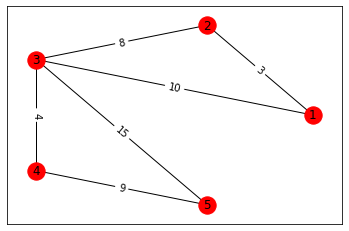

In [79]:
graph = graph_weighted_1

G = display_graph(graph)

if check_undirected(graph):
    print("My implementation of Djikstra's algorithm:\n")
    base_vertex = random.choice(graph[1])
    djikstra(graph, base_vertex)
    print("\nNetworkx's implementation of djikstra's algorithm:")
    print(nx.single_source_shortest_path(G, graph[1].index(base_vertex)))
else:
    print('Djikstras algorithm cannot be applied to this graph.')

{(0, 1): 3, (0, 2): 15, (1, 0): 1, (1, 2): 8, (2, 0): 10, (2, 1): 16, (2, 3): 4, (2, 4): 25, (3, 2): 4, (3, 4): 9, (4, 2): 15, (4, 3): 9}
Djikstras algorithm cannot be applied to this graph.


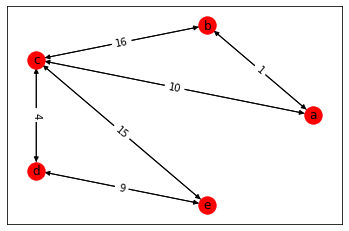

In [84]:
graph = graph_directed_1

if check_undirected(graph):
    G = display_graph(graph)
    print("My implementation of Djikstra's algorithm:\n")
    base_vertex = random.choice(graph[1])
    djikstra(graph, base_vertex)
    print("\nNetworkx's implementation of djikstra's algorithm:")
    print(nx.single_source_shortest_path(G, graph[1].index(base_vertex)))
else:
    print('Djikstras algorithm cannot be applied to this graph.')

My implementation of Djikstra's algorithm:

Vertex: y, Minimum Distance: 0, (base vertex)
Vertex: x, Minimum Distance: 1, Path: ['y', 'x']
Vertex: z, Minimum Distance: 1, Path: ['y', 'z']
Vertex: w, Minimum Distance: 2, Path: ['y', 'x', 'w']
Vertex: v, Minimum Distance: 2, Path: ['y', 'x', 'v']

Networkx's implementation of djikstra's algorithm:
{3: [3], 2: [3, 2], 4: [3, 4], 0: [3, 2, 0], 1: [3, 2, 1]}


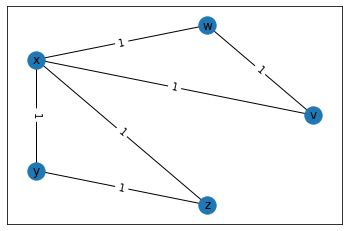

In [51]:
graph = graph_1

G = display_graph(graph)

if check_undirected(graph):
    print("My implementation of Djikstra's algorithm:\n")
    base_vertex = random.choice(graph[1])
    djikstra(graph, base_vertex)
    print("\nNetworkx's implementation of djikstra's algorithm:")
    print(nx.single_source_shortest_path(G, graph[1].index(base_vertex)))
else:
    print('Djikstras algorithm cannot be applied to this graph.')

Djikstras algorithm cannot be applied to this graph.


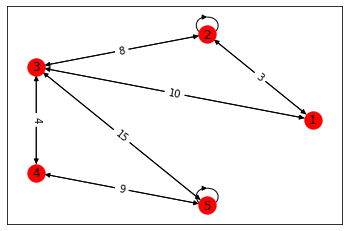

In [82]:
graph = graph_self_loop_1

G = display_graph(graph)

if check_undirected(graph):
    print("My implementation of Djikstra's algorithm:\n")
    base_vertex = random.choice(graph[1])
    djikstra(graph, base_vertex)
    print("\nNetworkx's implementation of djikstra's algorithm:")
    print(nx.single_source_shortest_path(G, graph[1].index(base_vertex)))
else:
    print('Djikstras algorithm cannot be applied to this graph.')

My implementation of Djikstra's algorithm:

Vertex: 3, Minimum Distance: 0, (base vertex)
Vertex: 2, Minimum Distance: 6, Path: ['3', '2']
Vertex: 4, Minimum Distance: 7, Path: ['3', '4']
Vertex: 1, Minimum Distance: 11, Path: ['3', '2', '1']

Networkx's implementation of djikstra's algorithm:
{2: [2], 1: [2, 1], 3: [2, 3], 0: [2, 1, 0]}


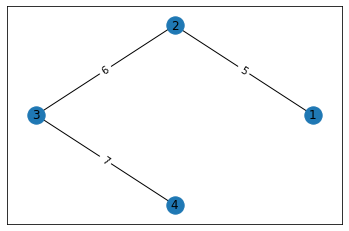

In [53]:
graph = graph_weighted_2

G = display_graph(graph)

if check_undirected(graph):
    print("My implementation of Djikstra's algorithm:\n")
    base_vertex = random.choice(graph[1])
    djikstra(graph, base_vertex)
    print("\nNetworkx's implementation of djikstra's algorithm:")
    print(nx.single_source_shortest_path(G, graph[1].index(base_vertex)))
else:
    print('Djikstras algorithm cannot be applied to this graph.')

My implementation of Djikstra's algorithm:

Graph is not connected, cannot apply djikstras algorthm.

Networkx's implementation of djikstra's algorithm:
{2: [2], 0: [2, 0], 1: [2, 1]}


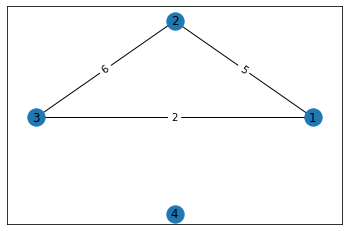

In [54]:
graph = graph_disconnected_1

G = display_graph(graph)

if check_undirected(graph):
    print("My implementation of Djikstra's algorithm:\n")
    base_vertex = random.choice(graph[1])
    djikstra(graph, base_vertex)
    print("\nNetworkx's implementation of djikstra's algorithm:")
    print(nx.single_source_shortest_path(G, graph[1].index(base_vertex)))
else:
    print('Djikstras algorithm cannot be applied to this graph.')